In [1]:
import numpy as np

import numpy.random as npr


import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [26]:
#Données 

L = 34.9*10**-2 #Longueur de la grille (m)
dL = 0.2*10**-2

N_barreaux = 23 #Nombre de barreaux

t=np.array([38405908,38432808, 38452096,38467896,38481516, 38493864, 38505016, 38515328, 38525136, 38534340, 38543004, 38551304, 38559716, 38567328 ,38574820 ,38582376 ,38589608, 38596524, 38603328 ,38610020, 38616540, 38622820, 38628936])*10**-6 #Temps de passage des barreaux (s)
t = t-t[0]
dt = 1*10**-6


z = np.array([]) #Position vertical de la grille
for k in range (N_barreaux) : 
    z = np.append(z, k*L/(N_barreaux-1))
dz = dL/N_barreaux


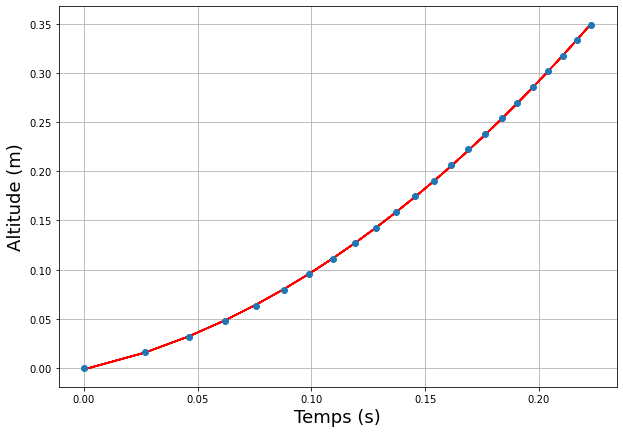

9.579973517532316 +- 0.009293163429534746


In [27]:
#Monte-Carlo
def f_lin(x,g,v0,x0):
    return 0.5*g*x**2+v0*x + x0

N_mc = 100 # nombre de simulations
param = np.zeros((3, N_mc))


for i in range(N_mc):
    
    z_mc = np.array([])
    t_mc = np.array([])
    
    for k in range (len(t)) :
        z_mc = np.append(z_mc, npr.normal(loc=(z[k]), scale=dz))
        t_mc = np.append(t_mc, npr.normal(loc=t[k], scale=dt))
            
    pop, covop = curve_fit(f_lin, t_mc, z_mc)
    param[0,i] = pop[0]
    param[1,i] = pop[1]
    param[2,i] = pop[2]
    
y_th = f_lin(t, *pop)

plt.figure(5, figsize=(10,7))
for i in range(N_mc):
    y_th = f_lin(t, *param[:,i])
    plt.plot(t, y_th,'r', alpha=0.1)
plt.errorbar(t, z, xerr=dt, yerr=dz, fmt='o')
plt.grid(which='both')
plt.xlabel('Temps (s)', fontsize=18)
plt.ylabel('Altitude (m)', fontsize=18)
plt.show()    

#Calcul de la pente

a_moy = np.mean(param[0,:])
a_sig = np.std(param[0,:])

print (a_moy, '+-',a_sig )
